In [1]:
# 导入最基本的数据处理工具
import pandas as pd # 导入Pandas数据处理工具包
df_ads = pd.read_csv('直播带货.csv') # 读入数据
df_ads.head(10) # 显示前几行数据

,转发量,品类热度,流量推送,成交额
0,2646,7,5,260004
1,816,4,6,100004
2,1224,6,5,164502
3,1261,6,6,163001
4,1720,7,5,260401
5,1541,7,5,220002
6,827,5,7,107503
7,866,5,9,110504
8,1314,8,5,229461
9,1431,6,5,165004


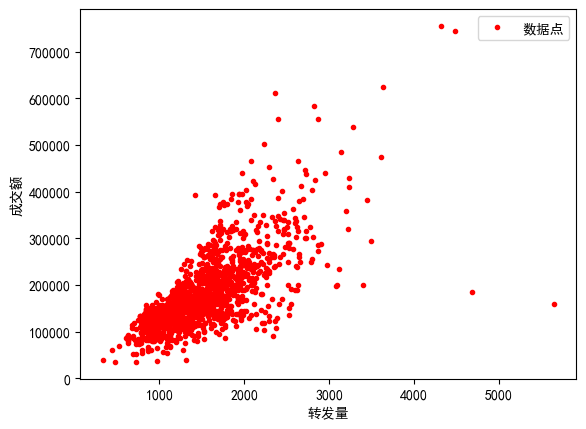

In [2]:
# 导入数据可视化所需要的库
import matplotlib.pyplot as plt #Matplotlib – Python画图工具库
import seaborn as sns #Seaborn – 统计学数据可视化工具库
# 设置字体为SimHei，以正常显示中文标签
plt.rcParams["font.family"]=['SimHei'] 
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 

plt.plot(df_ads['转发量'],df_ads['成交额'],'r.', label='数据点') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('转发量') # x轴Label
plt.ylabel('成交额') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

In [3]:
X = df_ads.drop(['成交额'],axis=1) # 特征集，Drop掉标签字段
y = df_ads.成交额 # 标签集
X.head() # 显示前几行数据

,转发量,品类热度,流量推送
0,2646,7,5
1,816,4,6
2,1224,6,5
3,1261,6,6
4,1720,7,5


In [4]:
y.head() # 显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 成交额, dtype: int64

In [5]:
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
model = LinearRegression() # 使用线性回归算法创建模型

In [7]:
model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定参数

LinearRegression()

In [8]:
y_pred = model.predict(X_test) #预测测试集的Y值

In [9]:
df_ads_pred = X_test.copy() #测试集特征数据
df_ads_pred['成交额真值'] = y_test #测试集标签真值
df_ads_pred['成交额预测值'] = y_pred #测试集标签预测值
df_ads_pred #显示数据

,转发量,品类热度,流量推送,成交额真值,成交额预测值
529,1378,7,9,161003,204516.360122
491,2090,7,5,207504,242936.889154
459,2207,7,5,180004,249664.428319
279,1382,6,5,176002,169916.207270
655,1556,6,6,154003,180551.192841
...,...,...,...,...,...
326,1574,8,5,232003,245577.161314
440,833,5,7,117001,107297.933262
1387,1797,7,5,213501,226089.291075
1323,804,5,7,119001,105630.423555


In [10]:
print("线性回归预测集评分：", model.score(X_test, y_test)) #评估模型
print("线性回归训练集评分：", model.score(X_train, y_train)) #训练集评分

线性回归预测集评分： 0.662399563560639
线性回归训练集评分： 0.7293166018868376


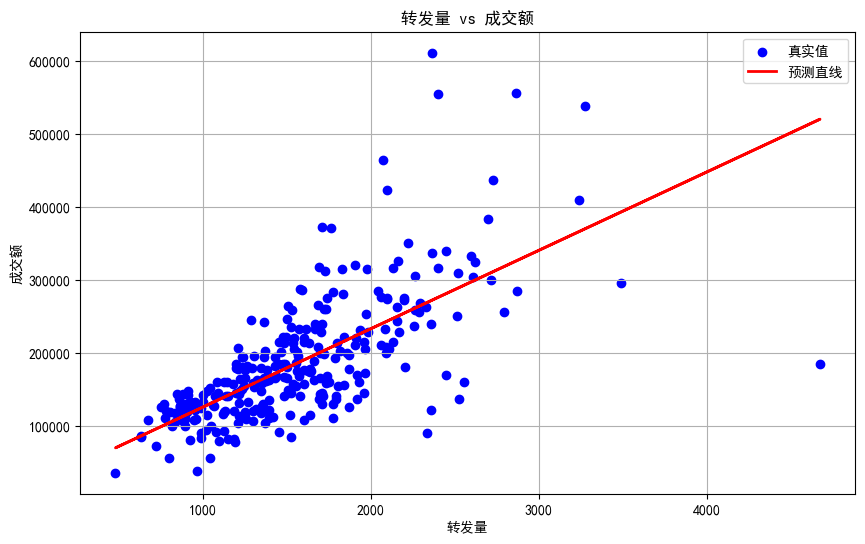

In [11]:
# 分离特征和标签
X = df_ads[['转发量']]
y = df_ads.成交额

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 使用线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 绘制预测直线
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='真实值')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='预测直线')
plt.xlabel('转发量')
plt.ylabel('成交额')
plt.title('转发量 vs 成交额')
plt.legend()
plt.grid(True)
plt.show()